In [2]:
import numpy as np
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.io import read_image
import torchvision.transforms.functional as fn
import matplotlib.pyplot as plt
import matplotlib.patches as patches

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
class SupervisedGazeEstimator(nn.Module):
  def __init__(self):
    super().__init__()
    self.transforms = ResNet18_Weights.DEFAULT.transforms()
    self.resnet18 = resnet18(weights=ResNet18_Weights.DEFAULT).eval()
    self.linear = nn.Linear(self.resnet18.fc.out_features, 2)

  def forward(self, data):
    x = self.transforms(x)
    x = self.resnet18(data)
    return self.linear(x)


In [4]:
model = SupervisedGazeEstimator().to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\gijsa/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


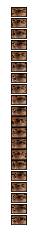

In [7]:
left_landmarks = np.load('data/1/left_landmarks.npy')

fig, axs = plt.subplots(nrows=20, ncols=1, squeeze=False)
for i in range(20):
    img = read_image(f'data/1/{i}.png')

    tlx, tly, brx, bry = left_landmarks[i]

    cropped = fn.crop(img, tly, tlx, bry - tly, brx - tlx)

    axs[i, 0].imshow(cropped.permute(1, 2, 0))
    axs[i, 0].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
plt.show()

In [14]:
right_landmarks = np.load('data/mix/left_landmark_mix.npy')
print(right_landmarks.shape)

(5880, 4)
